In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn

In [2]:
'''
This is a project that aims to analyze NY city bike traffic.
The data set contains traffic of four major bridges:
Brooklyn, Manhattan, Williamsburg, and Queensboro.
In addition, it also has date, temperature, and precipitation data.

Three major questions with scenarios:

1. If we want to install sensors on the bridge to estimate overall traffic
across all the bridges with only budget to install three sensors, which
bridges should we install the sensors to have the best prediction of overall
traffic.

2. The city administration is cracking down on helmet laws, and wants to
deploy police officers on days with high traffic to hand out citations.
Can they use the next day's weather forecast to predict the number of
bicyclists that day? --> In other words, is weather (temperature and
precipitation) related to number of bicyclists.

3. Can I use this data to predict whether it is raining based on the number
of bicyclists on the bridges? --> Similar to question 2 but not quite. This
time we are going the other way. If we have number of bicyclist determine
if we can infer the weather using that data.
'''

"\nThis is a project that aims to analyze NY city bike traffic.\nThe data set contains traffic of four major bridges:\nBrooklyn, Manhattan, Williamsburg, and Queensboro.\nIn addition, it also has date, temperature, and precipitation data.\n\nThree major questions with scenarios:\n\n1. If we want to install sensors on the bridge to estimate overall traffic\nacross all the bridges with only budget to install three sensors, which\nbridges should we install the sensors to have the best prediction of overall\ntraffic.\n\n2. The city administration is cracking down on helmet laws, and wants to\ndeploy police officers on days with high traffic to hand out citations.\nCan they use the next day's weather forecast to predict the number of\nbicyclists that day? --> In other words, is weather (temperature and\nprecipitation) related to number of bicyclists.\n\n3. Can I use this data to predict whether it is raining based on the number\nof bicyclists on the bridges? --> Similar to question 2 but no

In [3]:
# File pre-process
filename = "bike_data.csv"
dataset = pandas.read_csv(filename, parse_dates=True)
# dataset.head(1)
# dataset.describe()

In [4]:
rowSize = dataset.shape[0]

for i in range(rowSize):
    if dataset["Precipitation"][i] == "T":
        dataset.at[i, "Precipitation"] = "0.00"
    else:
        onlyNum = dataset["Precipitation"][i].rstrip(" (S)")
        dataset.at[i, "Precipitation"] = onlyNum

# dataset.head(30)

In [5]:
# change data values to integers and floats
for i in range(5, 10):
    for j in range(rowSize):
        rmComma = dataset.iat[j, i].split(",")
        toInt = ""
        for part in rmComma:
            toInt += part
        dataset.iat[j, i] = int(toInt)
        
for i in range(2, 5):
    for j in range(rowSize):
        dataset.iat[j, i] = float(dataset.iat[j, i])
        
# dataset.head(30)

In [6]:
def threeBridgeModel(b1, b2, b3):
    X = dataset[[f"{b1} Bridge", f"{b2} Bridge", f"{b3} Bridge"]].values
    y = dataset[["Total"]].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    PredictScore = model.score(X_test, y_test)

    return model, PredictScore

In [7]:
# Question 1
# Let's do a regression --> Each bridge traffic as feature and total traffic as y
Scores = [0, 1, 2, 3]
# Brooklyn, Manhattan, Williamsburg
bmwModel, Scores[0] = threeBridgeModel("Brooklyn", "Manhattan", "Williamsburg")

# Brooklyn, Manhattan, Queensboro
bmqModel, Scores[1] = threeBridgeModel("Brooklyn", "Manhattan", "Queensboro")

# Brooklyn, Williamsburg, Queensboro
bwqModel, Scores[2] = threeBridgeModel("Brooklyn", "Williamsburg", "Queensboro")

# Manhattan, Williamsburg, Queensboro
mwqModel, Scores[3] = threeBridgeModel("Manhattan", "Williamsburg", "Queensboro")

print(f"Total Traffic = {bmwModel.coef_[0][0]}*(Brooklyn Traffic) + {bmwModel.coef_[0][1]}*(Manhattan Traffic) + {bmwModel.coef_[0][2]}*(Williamsburg Traffic) + {bmwModel.intercept_[0]}")

Total Traffic = 1.1386000788715267*(Brooklyn Traffic) + 0.9471171505682368*(Manhattan Traffic) + 1.6086469611158551*(Williamsburg Traffic) + 382.7456681782314


In [8]:
# Question 1 Output
print("Brooklyn, Manhattan, Williamsburg (Score without Queensboro):", "r-squared - ", Scores[0], 100 * Scores[0], "%")
print("Brooklyn, Manhattan, Queensboro (Score without Williamsburg):", "r-squared - ", Scores[1], 100 * Scores[1], "%")
print("Brooklyn, Williamsburg, Queensboro (Score without Manhattan):", "r-squared - ", Scores[2], 100 * Scores[2], "%")
print("Manhattan, Williamsburg, Queensboro (Score without Brooklyn):", "r-squared - ", Scores[3], 100 * Scores[3], "%")

Brooklyn, Manhattan, Williamsburg (Score without Queensboro): r-squared -  0.995728908804532 99.5728908804532 %
Brooklyn, Manhattan, Queensboro (Score without Williamsburg): r-squared -  0.9881826020010465 98.81826020010465 %
Brooklyn, Williamsburg, Queensboro (Score without Manhattan): r-squared -  0.9472389433167309 94.72389433167308 %
Manhattan, Williamsburg, Queensboro (Score without Brooklyn): r-squared -  0.9821507190448353 98.21507190448354 %


In [9]:
# Multiple Variable Linear Regression
# Weather Features: temperature, precipitation --> dependent y value: number of bicyclist
X = dataset[["High Temp (°F)", "Low Temp (°F)", "Precipitation"]].values
y = dataset[["Total"]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.19, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# column names
col = (dataset[["High Temp (°F)", "Low Temp (°F)", "Precipitation"]]).columns
# coefficients of features
coeffs = pandas.DataFrame(regressor.coef_, ["coefficients"], columns=col)
y_pred = regressor.predict(X_test)

# print(y_test.transpose())
# print(y_pred.transpose())
print("score: ", regressor.score(X_test, y_test))
print(f"Total Traffic = {regressor.coef_[0][0]}*(High Temp) + {regressor.coef_[0][1]}*(Low Temp) + {regressor.coef_[0][2]}*(Precipitation) + {regressor.intercept_[0]}")

score:  0.4333519802026249
Total Traffic = 406.17916154797587*(High Temp) + -170.7826243577951*(Low Temp) + -8034.912567405353*(Precipitation) + -422.8260224649057


In [10]:
# Classification using Naive Bayes --> is it raining or not?
X = dataset[["Total"]].values
y = dataset[["Precipitation"]].values
y_data = [0 for _ in range(len(y))]

for idx, data in enumerate(y):
    if data > 0:
        y_data[idx] = 1
    else:
        y_data[idx] = 0
        
y_data = np.array(y_data)
        
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=0.2, random_state=1)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("score: ", model.score(X_test, y_test))
print(y_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)

score:  0.8372093023255814
[1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0]
[0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0]
[[29  2]
 [ 5  7]]


In [11]:
# Logistic Regerssion on Problem 3 was not quite successful
# TODO: Need some tweaking as well
X = dataset[["Total"]].values
y = dataset["Precipitation"].values
'''
ones = 0
zeros = 0
x_data = []
y_data = []

for idx, value in enumerate(y):
    if value > 0:
        y_data.append(1)
        x_data.append(list(X[idx]))
        ones += 1
    else:
        if zeros >= 68:
            continue
        y_data.append(0)
        x_data.append(list(X[idx]))
        zeros += 1

for idx, value in enumerate(y):
    if value > 0:
        y_data.append(1)
        x_data.append(list(X[idx]))
        ones += 1
    else:
        if zeros >= 68:
            continue
        y_data.append(0)
        x_data.append(list(X[idx]))
        zeros += 1
'''
        
# print(zeros, " ", ones)
# print(x_data)
# print(y_data)

# x_data = np.asarray(x_data)
# y_data = np.asarray(y_data)

y = y.astype("bool")
#print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model = LogisticRegression(solver="liblinear", tol=0.7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("score: ", model.score(X_test, y_test))
print(y_test)
print(y_pred)
#tn, fp, fn, tp 
result = confusion_matrix(y_test, y_pred).ravel()
print(result)

score:  0.7407407407407407
[ True False False False  True  True  True False False  True False False
 False False  True False  True  True False False False False False False
 False  True False False False False False False False  True False  True
 False False False  True False False False False False False False False
 False False False False  True  True]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
[40  0 14  0]


/opt/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:215: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


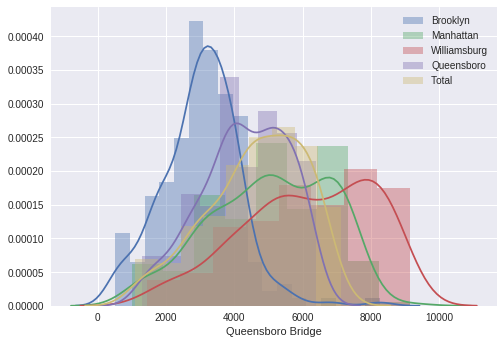

In [12]:
# Distribtuion Plot for Problem 1
plt.clf()

avgList = [0 for _ in range(rowSize)]

for i in range(rowSize):
    avgList[i] = (dataset["Total"][i]) / 4

seaborn.distplot(dataset["Brooklyn Bridge"], label="Brooklyn")
seaborn.distplot(dataset["Manhattan Bridge"], label="Manhattan")
seaborn.distplot(dataset["Williamsburg Bridge"], label="Williamsburg")
seaborn.distplot(dataset["Queensboro Bridge"], label="Queensboro")
seaborn.distplot(avgList, label="Total")
plt.legend()
plt.show()